In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')


In [17]:
train.describe()

,s13,s48,s56,s57,s59,n1,n2,n3,n4,n5,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
count,28322.000000,28322.000000,0.0,0.0,0.0,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,...,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.983123,0.433338,NaN,NaN,NaN,10.201863,1.600111,4.805099,5.080537,-32.641183,...,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740,0.168067
std,0.128814,0.495545,NaN,NaN,NaN,4.414660,0.664985,2.199282,2.276162,0.241453,...,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611,0.373933
min,0.000000,0.000000,NaN,NaN,NaN,2.200736,0.311727,0.000000,1.700370,-33.167589,...,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000,0.000000
25%,1.000000,0.000000,NaN,NaN,NaN,6.592127,1.013540,3.000000,2.833161,-32.862207,...,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000,0.000000
50%,1.000000,0.000000,NaN,NaN,NaN,9.535961,1.462197,5.000000,4.840320,-32.577026,...,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000,0.000000
75%,1.000000,1.000000,NaN,NaN,NaN,14.432580,2.194510,6.000000,7.300738,-32.396733,...,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000,0.000000
max,1.000000,1.000000,NaN,NaN,NaN,20.882733,3.137331,9.000000,8.594620,-32.289180,...,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,1.000000,0.999990,6.000000,1.000000


In [33]:
#Dropping all columns with all nan values

train.dropna(how = 'all', axis='columns', inplace=True)

In [34]:
#Finding names of all columns
train.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4',
       'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15',
       'label'],
      dtype='object')

In [63]:
# Lets see how many kinds of values dominate for the columns

unique_cols = train[['gender','s11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's58', 's69', 's70', 's71']]

for col in unique_cols.columns:
    print(col)
    print(unique_cols[col].unique())

gender
['M' 'F']
s11
['Y' 'N']
s12
['N' 'Y']
s13
[1 0]
s16
['D' 'B' 'C' 'A']
s17
['D' 'C' 'B' 'A']
s18
['B' 'D' 'C' 'A']
s48
[0 1]
s52
['1' 'l' '0' 'o']
s53
['  ' ' ']
s54
[nan 'b2' 'aa' '22' '2a' '2b' 'a2' 'bb' 'ab' 'ba']
s55
['kK' nan 'kk' '2K' 'k2' 'KK' '22' 'K2' '2k' 'Kk']
s58
['B' 'A']
s69
['x' '~1' 'C`' '0']
s70
['op: D' 'op: C' 'op: B' 'op: A']
s71
['b' 'd' 'c' 'a']


In [78]:
train['label'].value_counts()

0    23562
1     4760
Name: label, dtype: int64

## Starting the Visualization

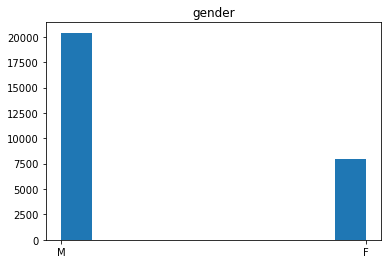

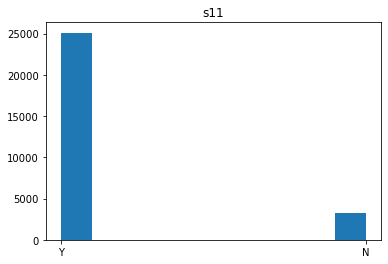

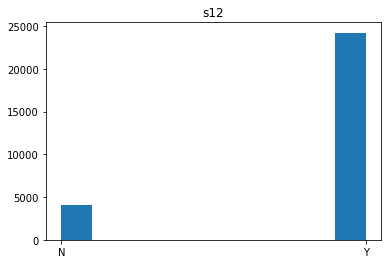

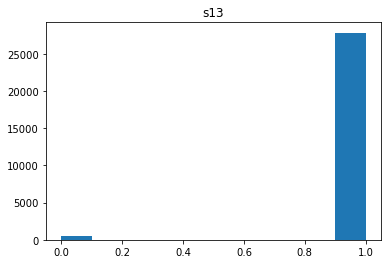

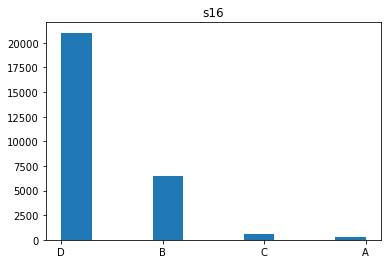

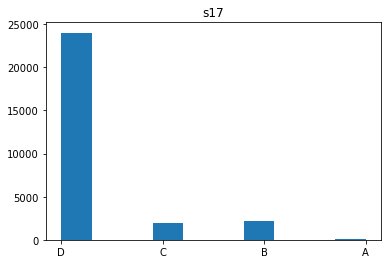

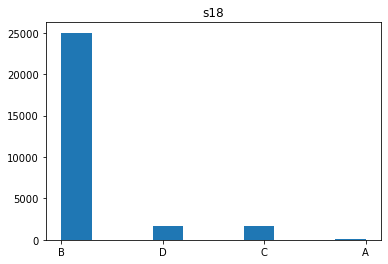

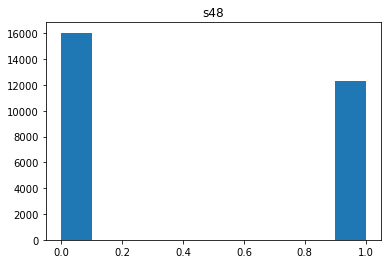

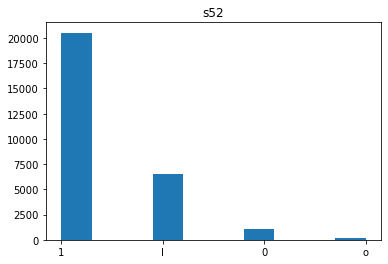

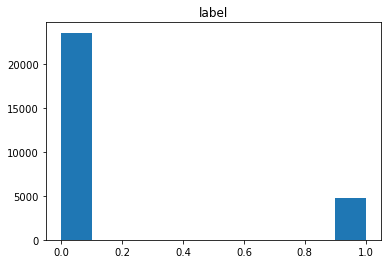

In [76]:
data_cols1 = train[['gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52', 'label']]

for i in data_cols1.columns:
    plt.hist(data_cols1[i])
    plt.title(i)
    plt.show()

In [77]:
# It seems s13 has maximum one type of value. So lets see what effect it has on label


train['s13'].value_counts()

1    27844
0      478
Name: s13, dtype: int64

In [82]:
pd.pivot_table(train, index = 'label',columns = 's13',values = ['id','gender'], aggfunc = 'count')

gender          id       
s13        0      1    0      1
label                          
0        112  23450  112  23450
1        366   4394  366   4394

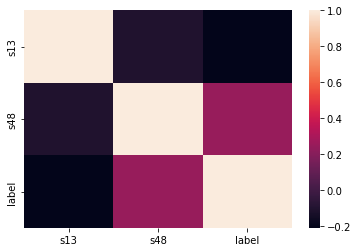

In [94]:
ht = sns.heatmap(data_cols1.corr())
